## Resample Time-Series

In [72]:
import pandas as pd
from glob import glob

def get_shortest_ts():
    files = glob('Z:\Descargas\CSV_DATA\*.csv')
    min_samples = 999999999999
    file_min = None
    for file in files:
        df = pd.read_csv(file)
        row_count = df.shape[0]
        if row_count < min_samples:
            min_samples = row_count
            file_min = file
            print(file, str(row_count))
            if min_samples == 832:
                break
    return min_samples, file_min

get_shortest_ts()

Z:\Descargas\CSV_DATA\0.csv 857
Z:\Descargas\CSV_DATA\1015.csv 832


(832, 'Z:\\Descargas\\CSV_DATA\\1015.csv')

In [86]:
from scipy import signal

def resample_data():
    size = 832
    files = glob('Z:\Descargas\CSV_DATA\*.csv')
    for file in files:
        df = pd.read_csv(file)
        cols = [col for col in df if col.endswith(('Flow rate', 'Pressure'))]     
        resampled_df = pd.DataFrame()
        for col in cols:
            resampled_df[col] = signal.resample(df[col], 832)    
        resampled_df['TOTAL_QUALITY'] = df['TOTAL_QUALITY']
        resampled_df.to_csv(file.replace('CSV_DATA', 'CSV_DATA_RESAMPLED'))
        
resample_data()

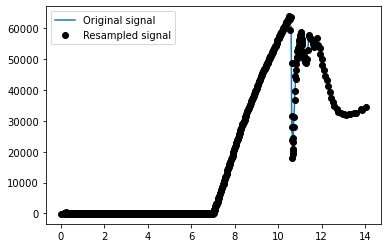

In [92]:
# shortest experiment = (832, 'Z:\\Descargas\\CSV_DATA\\1015.csv')

df1 = pd.read_csv('Z:\\Descargas\\CSV_DATA\\0.csv')
df2 = pd.read_csv('Z:\\Descargas\\CSV_DATA_RESAMPLED\\0.csv')
X_default = df1['Time']
y_default = df1['Zone2_Pressure']
X_resampled = signal.resample(X_default, 832)
y_resampled = df2['Zone2_Pressure']

import matplotlib.pyplot as plt
plt.plot(X_default, y_default, label='Original signal')
plt.plot(X_resampled, y_resampled, 'ko', label='Resampled signal')
plt.legend(loc='best')
plt.show()